In [14]:
ch = [0.35,
0.35,
0.35,
0.35,
0.35,
0.35,
0.35,
0.35,
0.35,
0.35,
0.35,
0.35,
0.35,
0.35,
0.35,
0.35,
0.35,
0.35,
0.35,
0.35,
0.35,
0.35]
print(ch)

[0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35]


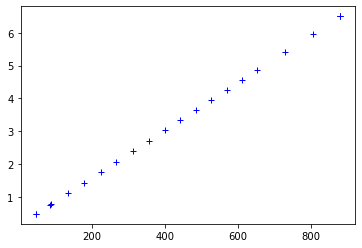

[6.5037158  6.50299375 6.50386021 0.75551221 0.49073483 5.96708491
 5.41413558 4.85504879 4.26332513 3.65549966 3.03633794 2.40064116
 1.76342808 1.11820018 0.48250341 0.79183155 1.43518211 2.07716075
 2.7124965  3.33822892 3.95320273 4.55359104]
[0.17955283825589194, 0.1795528380727533, 0.17955283829252217, 0.17955203926092955, 0.17955203421252533, 0.17955270788325878, 0.17955258556288853, 0.1795524742854086, 0.17955237009419334, 0.17955227761037368, 0.17955219855439797, 0.17955213329797617, 0.17955208406408046, 0.1795520507152681, 0.17955203410040296, 0.17955204017153414, 0.17955206502327714, 0.17955210628024304, 0.1795521632966402, 0.17955223519011357, 0.17955232106598937, 0.17955241945917547]


In [5]:
import numpy as np
import matplotlib.pyplot as plt
# calibration for materials

V = [88.8, 88.8, 104, 10.3, 5.72, 95.2, 85.6, 77.6, 68, 57.6, 47.6, 37, 26.6, 15.9, 5.32, 10.7, 21.4, 31.6, 42.4, 52.4, 62.4, 72.4]
E = [5.8, 0]
ch = [880.62, 880.52, 880.64, 84.53, 47.86, 806.3, 729.72, 652.29, 570.34, 486.16, 400.41, 312.37, 224.12, 134.76, 46.72, 89.56, 178.66, 267.57, 355.56, 442.22, 527.39, 610.54]
Volt_err = [0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35]
ch_err = np.ones(len(ch)) * 10


dif_V =  88.8 - 0.304
dif_E = 5.8 # MeV
m_1 = dif_E / dif_V
m_1_err = 5/dif_V
c_1 = m_1*0.304 * -1

m_e = [m_1,0]
c_e = [c_1, 0]

#m_1 = 5.8/880.62
#y = np.array(ch)
#y = ch * k # scale with k

# relate voltage to energy
def Vin_Eout(V): # assuming the intercept is at (0,0)
    return m_1*V

# relate channel number to voltage
y_weights = Volt_err
fit_parameters, fit_errors = np.polyfit(ch, V, 1, cov=True, w=y_weights)

m_v = [fit_parameters[0],fit_errors[0][0]]
c_v = [fit_parameters[1],fit_errors[1][1]]

def Chin_Vout(ch):
    return m_v[0]*ch + c_v[0]

def function(ch):
    return Vin_Eout(Chin_Vout(ch))

x = np.array(ch)
y = function(x)
plt.plot(x,y,"b+")
plt.show()
    

def energy_error(m_e, m_v, ch, c_v, c_e):
    # each value is an array [value, error]
    # c is a numpy array
    sigma_E = 0
    sigma_E += (m_e[0]*ch[0])**2 * m_v[1]**2
    sigma_E += (m_e[0]*m_v[0])**2 * ch[1]**2
    sigma_E += m_e[0]**2 * c_v[1]**2
    sigma_E = np.sqrt(sigma_E)
    return sigma_E
    
    
err_E = []
for counter in range(0,len(ch)):
    err_E.append(energy_error(m_e,m_v, [ch[counter],ch_err[counter]], c_v, c_e))

    


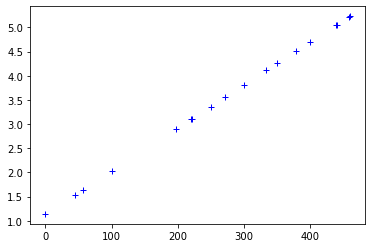

In [21]:
import numpy as np
import matplotlib.pyplot as plt
# calibration for gases

V = [42.4, 50, 64, 30.8, 7.92, 6.8, 55.6, 49.6, 42.8, 34.8, 27.4, 13.8, 64, 52.8, 46.8, 38.8, 31, 0.304]
E = [4.77, 0]
ch = [439.7, 459.8, 440.45, 220.5, 56.14, 44.45, 399.28, 350.36, 300.7, 249.5, 197.62, 100.07, 458.83, 378.18, 333.96, 271.38, 221.4, 0]
Volt_err = [3, 3, 1, 1, 1, 0.4, 1, 1, 1, 0.5, 0.5, 0.4, 1, 1, 1, 1, 1, 0.2]

dif_V =  0.5*(42.4+50) - 0.304
dif_E = 4.77 # MeV
m_1 = dif_E / dif_V
c_1 = m_1*0.304 * -1


# relate voltage to energy
def Vin_Eout(V):
    return m_1*V + c_1

# relate channel number to voltage
def Chin_Vout(ch):
    y_weights = Volt_err
    fit_parameters, fit_errors = np.polyfit(ch, V, 1, cov=True, w=y_weights)
    return fit_parameters[0]*ch + fit_parameters[1]

def function(ch):
    return Vin_Eout(Chin_Vout(ch))

x = np.array(ch)
y = function(x)
plt.plot(x,y,"b+")
plt.show()

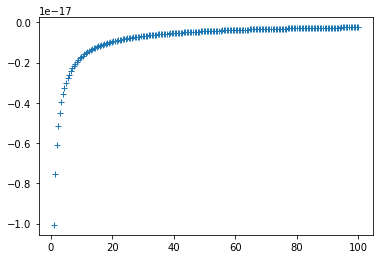

In [29]:
import numpy as np
x = np.linspace(1,100, num=200)
function = lambda N, Z, E, I: -3.801 * (N * Z / E) * (np.log(E) + 6.307 - np.log(I)) * 10**(-19) # eV

y = function(4,2,x,20)
plt.plot(x,y,"+")
plt.show()

In [6]:
import numpy as np
import matplotlib.pyplot as plt
# calibration for materials

V = [88.8, 88.8, 104, 10.3, 5.72, 95.2, 85.6, 77.6, 68, 57.6, 47.6, 37, 26.6, 15.9, 5.32, 10.7, 21.4, 31.6, 42.4, 52.4, 62.4, 72.4]
E = [5.8, 0]
ch = [880.62, 880.52, 880.64, 84.53, 47.86, 806.3, 729.72, 652.29, 570.34, 486.16, 400.41, 312.37, 224.12, 134.76, 46.72, 89.56, 178.66, 267.57, 355.56, 442.22, 527.39, 610.54]
Volt_err = [0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35]
ch_err = 


dif_V =  88.8 - 0.304
dif_E = 5.8 # MeV
m_1 = dif_E / dif_V
c_1 = m_1*0.304 * -1


#m_1 = 5.8/880.62
#y = np.array(ch)
#y = ch * k # scale with k

# relate voltage to energy
def Vin_Eout(V): # assuming the intercept is at (0,0)
    return m_1*V

# relate channel number to voltage
def Chin_Vout(ch):
    y_weights = Volt_err
    fit_parameters, fit_errors = np.polyfit(ch, V, 1, cov=True, w=y_weights)
    return fit_parameters[0]*ch + fit_parameters[1]

def function(ch):
    return Vin_Eout(Chin_Vout(ch))

x = np.array(ch)
y = function(x)
plt.plot(x,y,"b+")
plt.show()
    


SyntaxError: invalid syntax (<ipython-input-6-4ae2654ebfc2>, line 9)

In [1]:
            m_e = [m_1, 0]
            c_e = [c_1, 0]
            y_weights = Volt_err
            fit_parameters, fit_errors = np.polyfit(ch, V, 1, cov=True, w=y_weights)
            m_v = [fit_parameters[0], fit_errors[0][0]]
            c_v = [fit_parameters[1], fit_errors[1][1]]

            # relate channel number to voltage
            def Chin_Vout(ch):
                return fit_parameters[0] * ch + fit_parameters[1]

            def function(ch):
                return Vin_Eout(Chin_Vout(ch))

            def energy_error(m_e, m_v, ch, c_v, c_e):
                # each value is an array [value, error]
                # c is a numpy array
                sigma_E = 0
                sigma_E += (m_e[0] * ch[0]) ** 2 * m_v[1] ** 2
                sigma_E += (m_e[0] * m_v[0]) ** 2 * ch[1] ** 2
                sigma_E += m_e[0] ** 2 * c_v[1] ** 2
                sigma_E = np.sqrt(sigma_E)
                return sigma_E

            err_E = []
            for counter in range(0, len(ch)):
                err_E.append(energy_error(m_e, m_v, [ch[counter], ch_err[counter]], c_v, c_e))

NameError: name 'm_1' is not defined

In [3]:
### density numbers
N = [6.04E28,
9.24E28,
0.005E28,
0.0025E28,
0.0025E28]

string = "["
for entry in N:
    string += str(entry)
    string += ", "
    
print(string)

[6.04e+28, 9.24e+28, 5e+25, 2.5e+25, 2.5e+25, 


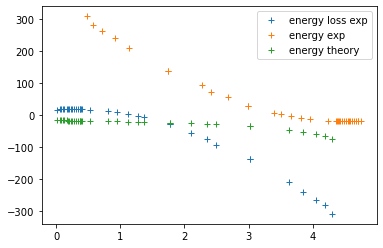

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# plot the -differential against energy
# plot the theoretical differential against energy
# compare find the difference

I = 41.8
N = 0.0025E28

distance = [0.00215, 0.00406, 0.00515, 0.00663, 0.0078, 0.00936, 0.01083, 0.01214, 0.01365, 0.01494,
            0.01665, 0.01793, 0.01935, 0.01992, 0.02078, 0.02149, 0.03059, 0.04397, 0.05891, 0.07058, 0.08652,
            0.10004, 0.11469, 0.12736, 0.14372, 0.14942, 0.15368, 0.15653, 0.0222, 0.05094, 0.06546, 0.08652,
            0.10744, 0.12736, 0.1608]  # in meters
distance = np.array(distance)

energy_loss = [0.01073, 0.05502, 0.06813, 0.09902, 0.11924, 0.16048, 0.1808, 0.19798, 0.2251, 0.24806,
               0.27814, 0.30587, 0.34204, 0.36358, 0.37598, 0.39193, 0.52889, 0.80392, 1.11339, 1.36902, 1.77592,
               2.09536, 2.49403, 3.01951, 3.63866, 3.84958, 4.05989, 4.19258, 0.40859, 0.95246, 1.26945, 1.77592,
               2.35413, 3.01951, 4.29571]
energy_loss = np.array(energy_loss)
energy = 4.77 - energy_loss

# both are positive
energy_loss_differential = [17.39843231, 17.72860832, 17.8958057, 18.09804591, 18.23764639,
     18.39577619, 18.51530772, 18.59754594, 18.6637039, 18.69571179,
     18.70294513, 18.68180322, 18.63140908, 18.60313111, 18.55166015,
     18.50112872, 17.18422636, 12.75768295, 3.60346146, -7.37015153,
     -29.18325443, -55.35626597, -93.6206528, -136.77044346, -209.19692368,
     -239.53023239, -264.10622509, -281.50333573, 18.44327125, 9.10010865,
     -2.09308477, -29.18325443, -73.26435609, -136.77044346, -309.06395831]

energy_differential = [-17.39843223, -17.72860778, -17.89580461, -18.09804358, -18.2376426,
 -18.39576963, -18.51529756, -18.59753162, -18.66368355, -18.69568511,
 -18.70290821, -18.6817571 , -18.63135112, -18.60306788, -18.55158837,
 -18.50104932, -17.18399736, -12.75700287,  -3.60182594,   7.3729643,
  29.18843574,  55.36427557,  93.63272167, 136.78697027, 209.22067248,
 239.5569204 , 264.13526144, 281.53401766, -18.44318372,  -9.09905118,
   2.09532875,  29.18843574,  73.27427784, 136.78697027, 309.09722029]

energy_loss_differential = np.array(energy_loss_differential)
energy_differential = np.array(energy_differential)

def function3(x):
        # the theoretical function for obtaining the range
        # returns POSITIVE dE/dx
        return -3.801*(N*2/x) * (np.log(np.abs(x)) + 6.307 - np.log(I)) * 1E-25 # MeV m^-1

energy_model = function3(energy)
    
plt.plot(energy_loss, energy_loss_differential,"+",label="energy loss exp")
plt.plot(energy, energy_differential,"+", label="energy exp")
plt.plot(energy_loss, energy_model, "+", label="energy theory")
plt.legend()
plt.show()


In [12]:
# energy loss differential
a = [-0.01763, 0.01314]
b = [16.97025, 1.88807]
c = [106.52984, 81.56778]
d = [-2155.39018, 1397.72986]
e = [20993.39666, 10102.44543]
f = [-57770.64359, 25820.20065]

function = lambda b1, c1, d1, e1, f1, x1: b1 + 2 * c1 * x1 + 3 * d1 * x1 ** 2 + 4 * x1 ** 3 + 5 * f1 * x1 ** 4
# differential
differential = function(b[0], c[0], d[0], e[0], f[0], distance)
print(differential)

[  17.39843231   17.72860832   17.8958057    18.09804591   18.23764639
   18.39577619   18.51530772   18.59754594   18.6637039    18.69571179
   18.70294513   18.68180322   18.63140908   18.60313111   18.55166015
   18.50112872   17.18422636   12.75768295    3.60346146   -7.37015153
  -29.18325443  -55.35626597  -93.6206528  -136.77044346 -209.19692368
 -239.53023239 -264.10622509 -281.50333573   18.44327125    9.10010865
   -2.09308477  -29.18325443  -73.26435609 -136.77044346 -309.06395831]


In [13]:
# energy differential
a = [4.78763, 0.01314]
b = [-16.97025, 1.88807]
c = [-106.52984, 81.56778]
d = [2155.39018, 1397.72986]
e = [-20993.39666, 10102.44543]
f = [57770.64359, 25820.20065]

function = lambda b1, c1, d1, e1, f1, x1: b1 + 2 * c1 * x1 + 3 * d1 * x1 ** 2 + 4 * x1 ** 3 + 5 * f1 * x1 ** 4
# differential
differential = function(b[0], c[0], d[0], e[0], f[0], distance)
print(differential)


[-17.39843223 -17.72860778 -17.89580461 -18.09804358 -18.2376426
 -18.39576963 -18.51529756 -18.59753162 -18.66368355 -18.69568511
 -18.70290821 -18.6817571  -18.63135112 -18.60306788 -18.55158837
 -18.50104932 -17.18399736 -12.75700287  -3.60182594   7.3729643
  29.18843574  55.36427557  93.63272167 136.78697027 209.22067248
 239.5569204  264.13526144 281.53401766 -18.44318372  -9.09905118
   2.09532875  29.18843574  73.27427784 136.78697027 309.09722029]


In [ ]:
def Simpson(lower_limit, upper_limit, sub_interval, function):
    f = function

    # Implementing Simpson's 1/3
    def simpson13(x0, xn, n):
        # calculating step size
        h = (xn - x0) / n

        # Finding sum
        integration = f(x0) + f(xn)

        for i in range(1, n):
            k = x0 + i * h

            if i % 2 == 0:
                integration = integration + 2 * f(k)
            else:
                integration = integration + 4 * f(k)

        # Finding final integration value
        integration = integration * h / 3

        return integration

    # Input section
    # Call trapezoidal() method and get result
    result = simpson13(lower_limit, upper_limit, sub_interval)
    print("Integration result by Simpson's 1/3 method is: {0}".format(result))
    return result

function = function_en

ranges_1 = []
for entry in energy:
    #calculating the energy ranges for the energy differential
    temp = Simpson(entry, 4.77, 10000,function)
